![Alt text](image/banner.webp)

### Welcome to the Code:You
#### Module 2 Knowledge Check.

In the cell below, we will import the necessary packages to ensure you have everything you need to complete this assignment. If these packages are not already installed, they will be installed automatically.

In [17]:
import subprocess
import sys

def install_and_import(package):
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} not found. Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        __import__(package)
        print(f"{package} has been installed.")

install_and_import('pandas')
install_and_import('matplotlib')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


pandas is already installed.
matplotlib is already installed.


The following block executes `api_call.py`, which retrieves data from the Louisville Open Data API. The data is then saved as a CSV file in the data folder. It could take a couple mins to run.

In [18]:
from api_call import data_creation

# data_creation()

Read in the data using the variable df

In [19]:
df = pd.read_csv("data/salary_data.csv", low_memory=False)

Display the first 5 rows of data. 

In [20]:
df.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId
0,2019,"Jones, Steven","Inspections, Permits & License",PR/B/M Inspector II,48214.4,37882.10,0.00,0.00,NaN,42052.65,1
1,2019,"Martin, David",Library,Library Page L/U,27331.2,27331.20,0.00,0.00,NaN,27331.20,2
2,2019,"Bratcher, Elaine",Louisville Metro Police,Clerk Typist II-Police,35256.0,35065.61,0.00,1563.12,NaN,37171.13,3
3,2019,"Hamilton, Edward",Mayor's Office,Chief of Public Services,129511.2,92152.20,0.00,0.00,NaN,112077.00,4
4,2019,"Jackson, Nila",Louisville Metro Police,Traffic Guard II,20592.0,20888.24,2713.79,900.00,NaN,24502.03,5


Display the last 5 rows of data. 

In [21]:
df.tail()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId
40658,2021,"Nash, DraShawn",Metro Corrections,Correction Officer Recruit,36212.8,4178.41,78.35,0.0,NaN,4256.76,40659
40659,2021,"Ransom, JaQuan",Solid Waste Management,Sanitation Tipper,37481.6,8505.45,4031.99,0.0,NaN,12537.44,40660
40660,2021,"Cole, Adrian",Solid Waste Management,Sanitation Tipper,37481.6,4324.80,1961.94,0.0,NaN,6286.74,40661
40661,2021,"Nalley, Matthew",Parks & Recreation,Recreation Assistant P/U,33800.0,3900.00,0.00,0.0,NaN,3900.00,40662
40662,2021,"Sullivan, Scott",Parks & Recreation,Golf Operations Supervisor I,40331.2,4653.60,0.00,0.0,NaN,4653.60,40663


Find the shape of the dataframe 

In [22]:
df.shape

(40663, 11)

Use the describe function to gain some insights to out data. 

In [23]:
df.describe()

,CalYear,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId
count,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,0.0,40663.000000,40663.000000
mean,2021.522342,53085.690898,40913.618357,5927.180539,2217.654347,NaN,50093.204813,20332.000000
std,1.716386,23796.933084,25210.273063,10845.641888,3951.158763,NaN,32494.515464,11738.541335
min,2019.000000,0.000000,-320.640000,-282.600000,-2500.000000,NaN,-320.640000,1.000000
25%,2020.000000,39062.400000,23242.100000,0.000000,0.000000,NaN,26141.900000,10166.500000
50%,2022.000000,51168.000000,41637.130000,619.240000,0.000000,NaN,48684.890000,20332.000000
75%,2023.000000,64147.200000,55670.410000,6780.665000,2884.340000,NaN,70323.445000,30497.500000
max,2024.000000,520000.000000,235572.270000,125713.910000,43853.330000,NaN,262051.220000,40663.000000


Find the unique vales in the CalYear column

In [24]:
df['CalYear'].unique()

array([2019, 2020, 2022, 2023, 2024, 2021])

Filter the DataFrame to include only rows where the `CalYear` is `2024`, and assign the result to a variable named `df_2024`.

In [25]:
df_2024 = df[df['CalYear'] == 2024]
df_2024.head(1)

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId
26800,2024,"Hancock, Steven",Louisville Free Public Library,Library Clerk LU,37044.8,23843.6,838.08,0.0,NaN,24712.18,26801


This will test to see if you filtered the dataframe correctly. 

In [26]:
try:
    if 'df_2024' in globals():
        if not df_2024[df_2024['CalYear'] != 2024].empty:
            years = df_2024['CalYear'].unique()
            print(f"Your dataframe still has {years} in the CalYear column.")
        else:
            print("Congratulations, you dropped the correct columns!")
    else:
        print("The dataframe 'df_2024' is not defined. Did you name the dataframe correctly?")       
except NameError:
    print("Did you name the dataframe correctly?")

Congratulations, you dropped the correct columns!


Drop the columns in the `cols_to_drop` list. 

In [27]:
cols_to_drop = ['Annual_Rate', 'Overtime_Rate', 'Incentive_Allowance', 'Other', 'ObjectId']

df_2024 = df_2024.drop(columns=cols_to_drop)
df_2024.head(1)

,CalYear,Employee_Name,Department,jobTitle,Regular_Rate,YTD_Total
26800,2024,"Hancock, Steven",Louisville Free Public Library,Library Clerk LU,23843.6,24712.18


This will check to see if the columns got dropped or not.

In [28]:
try:
    if 'df_2024' in globals():
        cols_to_drop = ['Annual_Rate', 'Overtime_Rate', 'Incentive_Allowance', 'Other', 'ObjectId']
        remaining_cols = [col for col in cols_to_drop if col in df_2024.columns]
        if remaining_cols:
            print(f"The following columns were not dropped: {remaining_cols}")
        else:
            print("Congratulations, all specified columns were successfully dropped!")
    else:
        print("The dataframe 'df_2024' is not defined. Did you name the dataframe correctly?")
        
except NameError:
    print("Did you name the dataframe correctly?")


Congratulations, all specified columns were successfully dropped!


Remove rows from `df_2024` where the `YTD_Total` column contains either null values or zeros.

In [29]:
df_2024 = df_2024[df_2024['YTD_Total'].notna() & (df_2024['YTD_Total'] != 0)]

This will test to see if you removed rows with NaN or 0 values in 'YTD_Total'.

In [31]:
try:
    if 'df_2024' in globals():
        if df_2024['YTD_Total'].isna().any():
            print("There are still NaN values in the 'YTD_Total' column.")
        elif (df_2024['YTD_Total'] == 0).any():
            print("There are still rows with 'YTD_Total' equal to 0.")
        else:
            print("Congratulations, you've successfully removed rows with NaN or 0 values in 'YTD_Total'!")
    
    else:
        print("The dataframe 'df_2024' is not defined. Did you name the dataframe correctly?")
        
except NameError:
    print("Did you name the dataframe correctly?")


Congratulations, you've successfully removed rows with NaN or 0 values in 'YTD_Total'!


If all the above was done correctly the below code will run and plot our findings of annual salary vs YTD salary spend. 

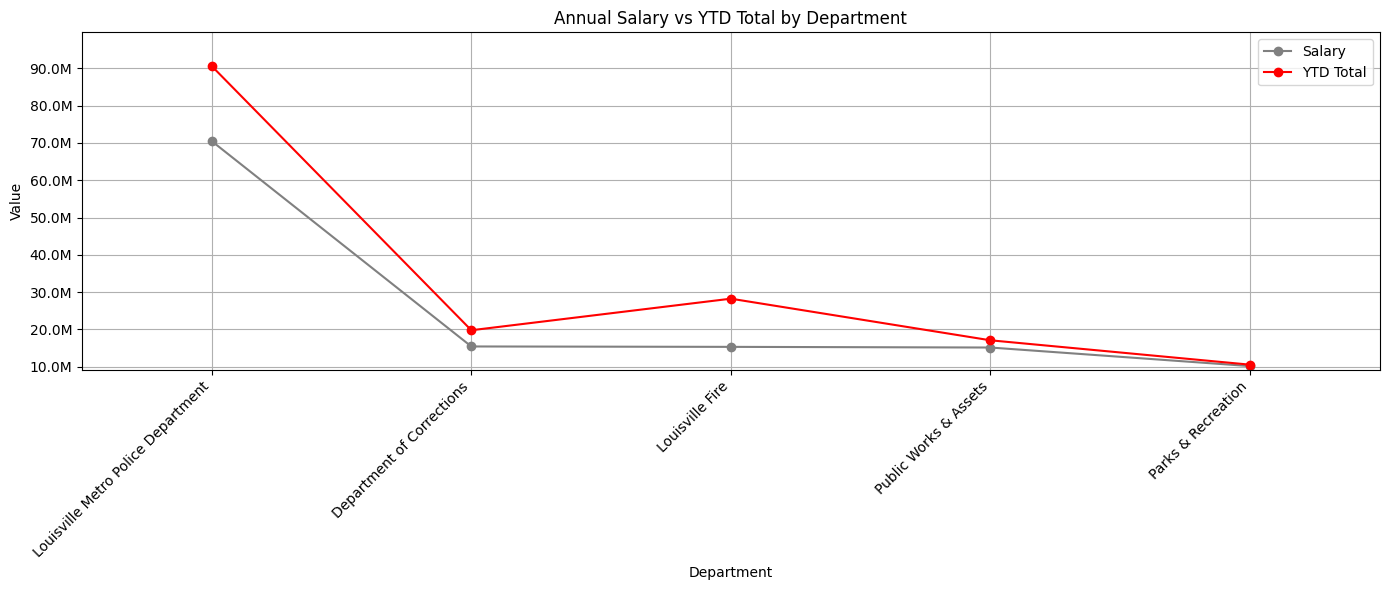

In [30]:
grouped_df = df_2024.groupby('Department')[['Regular_Rate', 'YTD_Total']].sum()
grouped_df = grouped_df.sort_values(by='Regular_Rate', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(14, 6))

grouped_df.plot(kind='line', marker='o', ax=ax, color=['grey', 'red'], legend=True)

ax.set_title('Annual Salary vs YTD Total by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Value')

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xticks(rotation=45, ha='right')

ax.set_xticks(range(len(grouped_df)))
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')

ax.set_xlim([-0.5, len(grouped_df) - 0.5])

y_min, y_max = grouped_df.min().min() * 0.9, grouped_df.max().max() * 1.1
ax.set_ylim([y_min, y_max])

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], ['Salary', 'YTD Total'])

plt.grid(True)
plt.tight_layout()
plt.show()